In [2]:
# adding autoload so that we dont need to restart kernel to reload libraries every time
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
from neural_network import *
import numpy as np
from matplotlib import pyplot as plt

In [83]:
# creating the dataset
x = np.arange(0,2*np.pi,0.1)
x = np.random.permutation(x)
y = np.sin(2*x)

In [109]:
#creating the transformation
number_of_rbf_nodes = 20
means = np.linspace(0, 2*np.pi,number_of_rbf_nodes)
sigmas = np.ones(number_of_rbf_nodes)
rbf = RbfTransformation(means,sigmas)

In [110]:
# creating the network
nn = NN(1) # the number of inputs
nn.add_transformation(rbf) # adding the transformation we created
nn.add_layer(1, function=Linear()) #adding a linear layer at the end

In [111]:
# training the network
nn.train_batch(x,y,5,200,0.1,0)

In [112]:
#prediction
ans = []
for x_s in x:
    ans.append(nn.feed_forward(x_s)[1][0])
ans = np.array(ans)

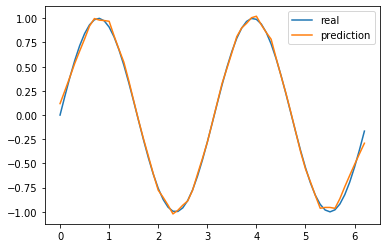

In [117]:
#ploting
indexes = np.argsort(x)
plt.plot(x[indexes],y[indexes], label="real")
plt.plot(x[indexes],ans[indexes], label="prediction")
plt.legend()